# Case Nextel - House Price Prediction

Inicialização do ambiente de trabalho

In [2]:
# bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
#import missingno as msno
import gc
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

# Inicialização do Arquivo

In [3]:
houses = pd.read_csv('house_sales.csv')

In [10]:
houses.head(6)

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,221900,3,1.00,1180,5650,1.00,0,3,0,1955,0,98178,47.51,-122.26,1340,5650
1,538000,3,2.25,2570,7242,2.00,0,3,400,1951,1991,98125,47.72,-122.32,1690,7639
2,180000,2,1.00,770,10000,1.00,0,3,0,1933,0,98028,47.74,-122.23,2720,8062
3,604000,4,3.00,1960,5000,1.00,0,5,910,1965,0,98136,47.52,-122.39,1360,5000
4,510000,3,2.00,1680,8080,1.00,0,3,0,1987,0,98074,47.62,-122.04,1800,7503
5,1225000,4,4.50,5420,101930,1.00,0,3,1530,2001,0,98053,47.66,-122.01,4760,101930


In [11]:
houses.shape

(18448, 16)

In [12]:
houses.describe()

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
count,18448.00,18448.00,18448.00,18448.00,18448.00,18448.00,18448.00,18448.00,18448.00,18448.00,18448.00,18448.00,18448.00,18448.00,18448.00,18448.00
mean,542362.37,3.37,2.12,2083.94,15036.02,1.49,0.01,3.41,293.57,1971.00,85.15,98077.92,47.56,-122.21,1988.31,12571.60
std,372013.52,0.93,0.77,921.42,41814.55,0.54,0.09,0.65,443.61,29.36,403.37,53.50,0.14,0.14,686.17,26329.26
min,78000.00,0.00,0.00,290.00,520.00,1.00,0.00,1.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,321837.50,3.00,1.75,1430.00,5050.00,1.00,0.00,3.00,0.00,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1920.00,7600.50,1.50,0.00,3.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7611.00
75%,648000.00,4.00,2.50,2560.00,10625.25,2.00,0.00,4.00,570.00,1997.00,0.00,98118.00,47.68,-122.13,2370.00,10050.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6110.00,858132.00


Outliers detectados: casa com 33 quartos.


In [13]:
houses.dtypes

price                         int64
num_bed                       int64
num_bath                    float64
size_house                    int64
size_lot                      int64
num_floors                  float64
is_waterfront                 int64
condition                     int64
size_basement                 int64
year_built                    int64
renovation_date               int64
zip                           int64
latitude                    float64
longitude                   float64
avg_size_neighbor_houses      int64
avg_size_neighbor_lot         int64
dtype: object

In [8]:
cat_features = ['num_bed', 'num_bath', 'num_bath', 'num_floors', 'is_waterfront', 'condition']

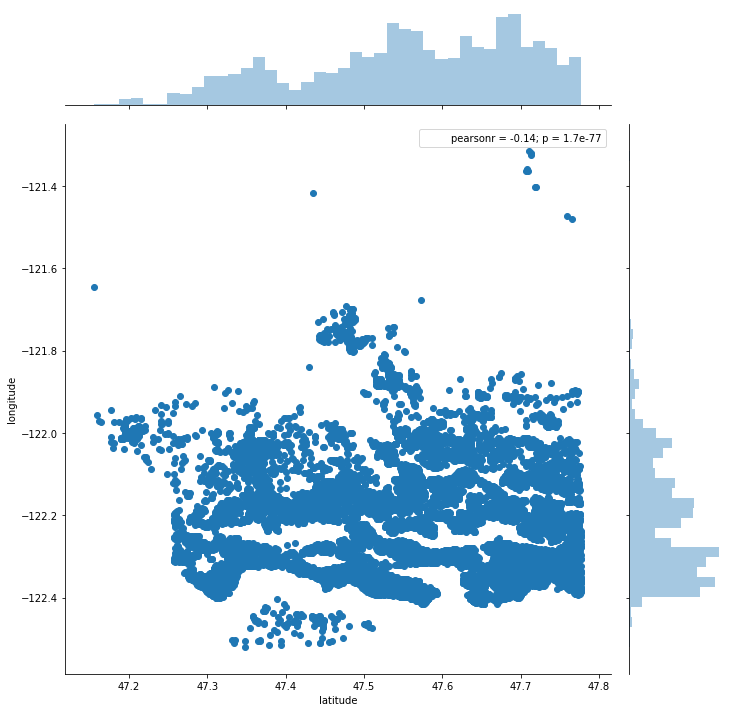

In [4]:
sns.jointplot(houses.latitude, houses.longitude, size = 10)

C:\Users\rafae\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rafae\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


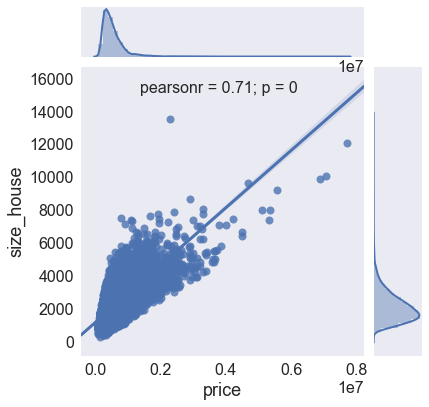

In [13]:
# Scatterplot com linha de regressão - Distribuição bivariada 
sns.jointplot(x = "price", y = "size_house", data = houses, kind = "reg");

C:\Users\rafae\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rafae\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


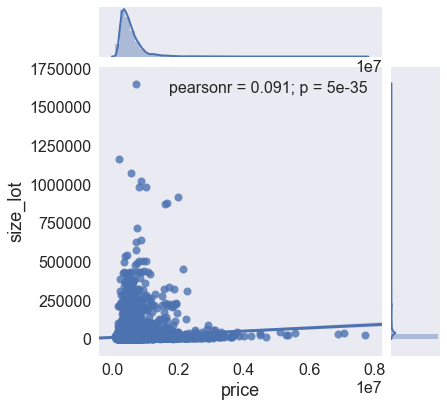

In [14]:
# Scatterplot com linha de regressão - Distribuição bivariada 
sns.jointplot(x = "price", y = "size_lot", data = houses, kind = "reg");

ValueError: The number of observations cannot be determined on an empty distance matrix.

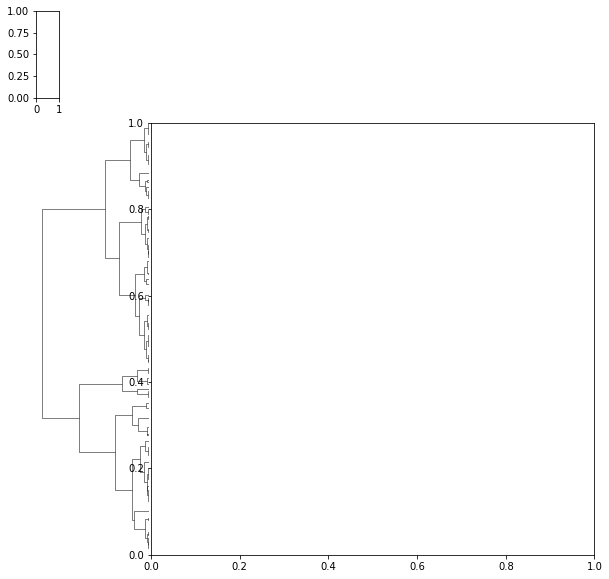

In [5]:
sns.clustermap(houses.zip)